In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [56]:
inspector = inspect(engine)
print(inspector.get_table_names())
i = inspector.get_columns('station')

for x in i:
    print(x)

['measurement', 'station']
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [12]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


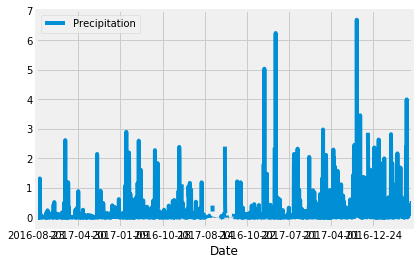

In [13]:
q1 = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

last_day = q1[0]

last_day = dt.datetime.strptime(last_day, '%Y-%m-%d')

one_year = last_day - dt.timedelta(days=365)

q = session.query(Measurement.prcp,Measurement.date).\
    filter(Measurement.date >= one_year.date().strftime('%Y-%m-%d'))

df = pd.DataFrame(q,columns=['Precipitation','Date'])
df = df.set_index('Date')
df.fillna(0)
df.plot()

In [48]:
q = session.query(Station.name,func.count(Measurement.station)).\
        filter(Station.station == Measurement.station).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc())

print(q.statement)

for i in q:
    print(i)

SELECT station.name, count(measurement.station) AS count_1 
FROM station, measurement 
WHERE station.station = measurement.station GROUP BY measurement.station ORDER BY count(measurement.station) DESC
('WAIHEE 837.5, HI US', 2772)
('WAIKIKI 717.2, HI US', 2724)
('KANEOHE 838.1, HI US', 2709)
('WAIMANALO EXPERIMENTAL FARM, HI US', 2669)
('MANOA LYON ARBO 785.2, HI US', 2612)
('KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202)
('HONOLULU OBSERVATORY 702.2, HI US', 1979)
('PEARL CITY, HI US', 1372)
('UPPER WAHIAWA 874.3, HI US', 511)


In [51]:
last_day

datetime.datetime(2017, 8, 23, 0, 0)

In [60]:
q = session.query(Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation).\
                filter(Station.station == Measurement.station).\
                filter(Measurement.date >= one_year.date().strftime('%Y-%m-%d')).\
                filter(Measurement.date >= one_year.date().strftime('%Y-%m-%d')).\
                order_by(Measurement.prcp.desc())

for i in q:
    print (i)

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
('USC00516128', 'MANOA LYON ARBO 785.2

('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519523', 